In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from PIL import Image

In [104]:
# include the background
num_masks = 10 + 1
num_time_steps = 9

In [230]:
masks = np.load('masks.npy')

In [231]:
masks.shape

(99, 32, 64, 64, 1)

In [232]:
# switch to (timestep, layer, batch_id, row, col) index
masks = masks.reshape((9, num_masks, 32, 64, 64))

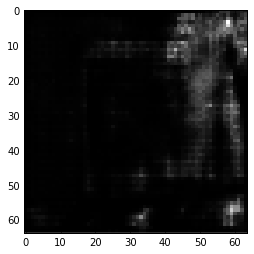

In [233]:
imshow(masks[5,0,5,:,:], interpolation='none', cmap='Greys')

In [234]:
kernels = np.load('kernels.npy')

In [235]:
kernels.shape

(9, 32, 1, 5, 5, 3, 10)

In [236]:
# switch to (timestep, layer, batch_id, row, col) index
# all color channel share the same mask
kernels = kernels[:, :, 0, :, :, 0, :].transpose([0, 4, 1, 2, 3])

In [237]:
kernels.shape

(9, 10, 32, 5, 5)

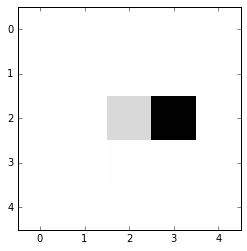

In [238]:
imshow(kernels[7,2,3,:,:], interpolation='none', cmap='Greys')

In [239]:
tf_layers = np.load('tf_layers.npy')

In [240]:
tf_layers.shape

(99, 32, 64, 64, 3)

In [241]:
tf_layers = tf_layers.reshape((9, num_masks, 32, 64, 64, 3))

In [242]:
(tf_layers[5, 9, 5] * np.expand_dims(masks[5, 9, 5], 3)).max()

0.0048701023

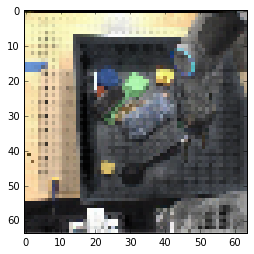

In [243]:
imshow(tf_layers[0, 0, 16], interpolation='none')

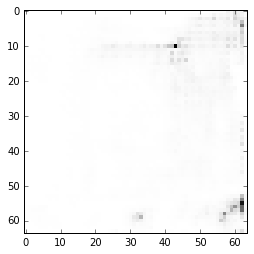

In [244]:
imshow(masks[5,3,16,:,:], interpolation='none', cmap='Greys')

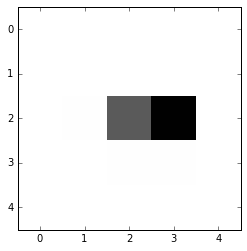

In [245]:
imshow(kernels[5,6,16,:,:], interpolation='none', cmap='Greys')

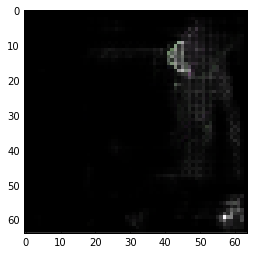

In [246]:
masked_layer = tf_layers[5, 3, 16] * np.expand_dims(masks[5, 2, 16], 3)
imshow(masked_layer / masked_layer.max(), interpolation='none')

In [247]:
gen_images = np.load('gen_images.npy')

In [248]:
gen_images.shape

(9, 32, 64, 64, 3)

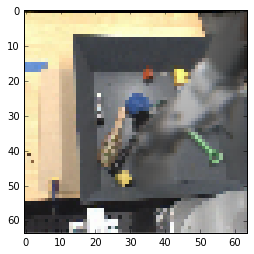

In [249]:
imshow(gen_images[8, 3], interpolation='none')

In [250]:
gt_images = np.load('gt_images.npy')

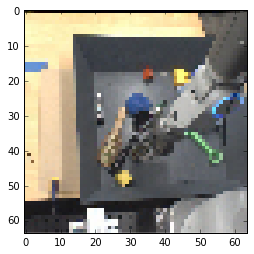

In [251]:
imshow(gt_images[8, 3], interpolation='none')

In [252]:
import imageio

In [253]:
for i in xrange(32):
    imageio.mimsave('img.%d.gif' % i, hstack([gen_images[:, i], gt_images[1:, i]]))

/usr/local/lib/python2.7/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float32 to uint8, range [0.0, 1.00000011921]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))
/usr/local/lib/python2.7/site-packages/imageio/core/util.py:104: UserWarning: Conversion from float32 to uint8, range [0.0, 1.00000023842]
  'range [{2}, {3}]'.format(dtype_str, out_type.__name__, mi, ma))


In [254]:
flat_masks = (masks/masks.max(axis=(3, 4), keepdims=True)).transpose((0, 2, 3, 1, 4))
for i in xrange(32):
    imageio.mimsave('masks.%d.gif' % i, flat_masks[:, i].reshape((9, 64, -1)))

In [255]:
flat_kernels = kernels.transpose((0, 2, 3, 1, 4))
print flat_kernels.shape
for i in xrange(32):
    imageio.mimsave('kernels.%d.gif' % i, flat_kernels[:, i].reshape((9, 5, -1)))

(9, 32, 5, 10, 5)


In [256]:
flat_layers = (tf_layers/tf_layers.max(axis=(3, 4, 5), keepdims=True)).transpose((0, 2, 3, 1, 4, 5))
print flat_kernels.shape
for i in xrange(32):
    imageio.mimsave('layers.%d.gif' % i, flat_layers[:, i].reshape((9, 64, -1, 3)))

(9, 32, 5, 10, 5)


In [257]:
flat_masked_layers = tf_layers * np.expand_dims(masks, 5)
flat_masked_layers = (flat_masked_layers/flat_masked_layers.max(axis=(3, 4, 5), keepdims=True)).transpose((0, 2, 3, 1, 4, 5))
print flat_masked_layers.shape
for i in xrange(32):
    imageio.mimsave('masked_layers.%d.gif' % i, flat_masked_layers[:, i].reshape((9, 64, -1, 3)))

(9, 32, 64, 11, 64, 3)


In [258]:
def greyscale_to_rgb(a, time_dim=None):
    if time_dim == None:
        return np.transpose([a] * 3, (1, 2, 0))
    return np.transpose([a] * 3, (1, 2, 3, 0))

In [259]:
n_samples = 32
for i in xrange(n_samples):
    merged_mask_layer = np.stack([
            greyscale_to_rgb(flat_masks[:, i].reshape((9, 64, -1)), True), 
            flat_layers[:, i].reshape((9, 64, -1, 3)), 
            flat_masked_layers[:, i].reshape((9, 64, -1, 3))
        ], 1)
    imageio.mimsave('masks_n_layers.%d.gif' % i, merged_mask_layer.reshape((9, 3*64, 64*num_masks, 3)))

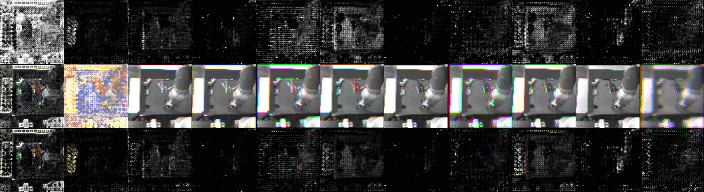

In [199]:
PIL.Image.open('masks_n_layers.10.gif')